### Step 1: data generation and scatter plot

In [1]:
#generate random data as 2-dimensional
import numpy as np
n = 100
X1 =3 * np.random.rand(n, 1) - 1
X2 =3 * np.random.rand(n, 1) - 1
X = np.concatenate((X1, X2), axis=1)
print(X1.shape)
print(X2.shape)
print(X.shape)

(500, 1)
(500, 1)
(500, 2)


In [2]:
#creates output values (target)  as  y  attribute
noiseLevel = 10
noise = noiseLevel * np.random.randn(n, 1)

A = 3
B = 5
C = 1
D = -2
#y = (D - (A*X1 + B*X2)) / C + noise
y =  -(A*X1 + B*X2 + D) / C  + noise
print(y.shape)

(500, 1)


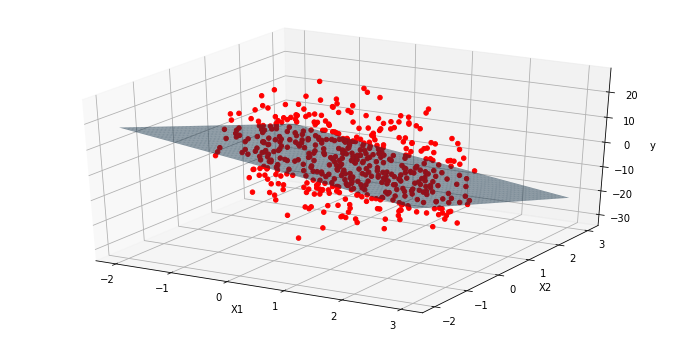

In [3]:
# shows the data points in 3D
import matplotlib.pyplot as plt
%matplotlib inline 
m = 50
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A * xx + B * yy + D) * 1. / C 
#zz = (D - A * xx - B * yy ) * 1. / C  

ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y, color='red', alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

plt.show()

### Step 2: linear regression training and prediction using Normal Equation and scatter plot

In [4]:
#add x0 = 1 to each instance
X_b = np.c_[np.ones((n,1)),X]
X_b
print(X_b.shape)

(500, 3)


In [5]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

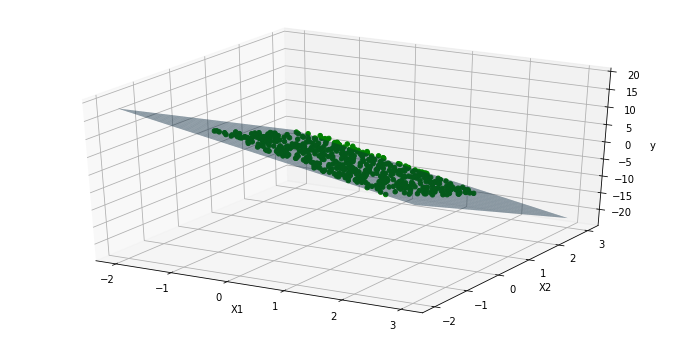

In [6]:
#shows the predicts in 3D with plane
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
y_hat =np.dot(X_b,w_estimate)
ax.scatter(X1, X2, y_hat, color='green', alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

plt.show()

### Step 3: linear regression training and prediction using Scikit-learn and scatter plot

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.54569251]), array([[-3.79018789, -4.01349738]]))

In [8]:
#do prediction
predict = lin_reg.predict(X)

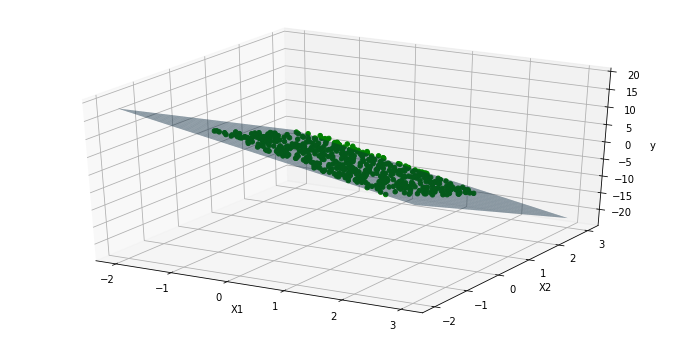

In [9]:
#shows the predicts in 3D with plane
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
y_hat = predict
ax.scatter(X1, X2, y_hat, color='green', alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

plt.show()

### outlier

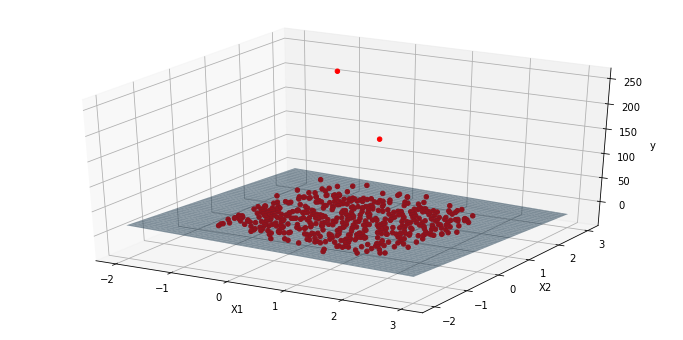

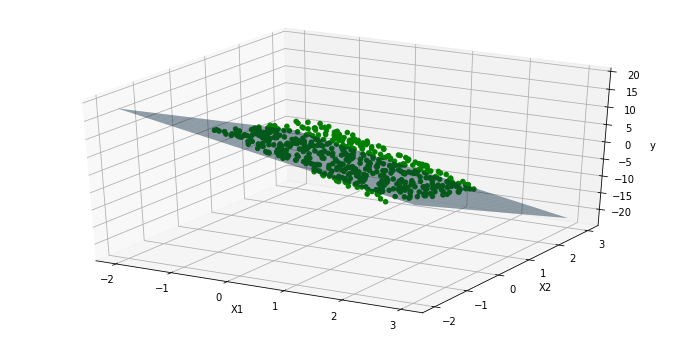

In [10]:
y[n-1] = 150
y[n-2] = 250
import matplotlib.pyplot as plt
%matplotlib inline 
m = 50
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A * xx + B * yy + D) * 1. / C 
  

ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y, color='red', alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

plt.show()

ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_hat =np.dot(X_b,w_estimate)
ax.scatter(X1, X2, y_hat, color='green', alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

plt.show()